<font color = 'brown'  size = 3>
    
# Espectro Mossbauer

El siguiente programa permite obtener el espectro Mossbauer de compuestos que contienen hierro.

Se importan las librerías de utilidad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para construir el espectro será necesario conocer el valor del despalazamiento isomérico ($\delta$) y el desdoblamiento cuadrupolar ($\Delta E_{Q}$) correspondientes al compuesto utilizado, es decir, los parámetros Mossbauer del compuesto.

Para realizar el espectro se considerará la información generada en el output de ORCA, éste archivo contiene el valor de la densidad electrónica ($\rho_{0}$) y el valor del desdoblamiento cuadrupolar ($\Delta E_{Q}$), así que será necesario determinar el valor del desplazamiento isomérico ($\delta$) de acuerdo a la relación lineal:

$$\delta = \alpha (\rho_{0} - C ) + \beta$$.

Donde los valores de $\alpha$, $C$ y $\beta$ son: $\alpha = -0.3612$, $C = 11810$ y $\beta = 2.830$.

El ancho natural de la linea Moessbauer es de $w = 0.194 \frac{mm}{seg}$, sin embargo el valor $w = 0.39 \frac{mm}{s}$ también podría ser un buen valor para las simulaciones.

Se propone una absorción del 5%, esto significa que el mínimo de las curvas debe estar alrededor del 95% en en la gráfica. Para lograr esto hay que modificar el parámetro $I$ que corresponde al ajuste de la intensidad.

In [2]:
datos01 = np.loadtxt('Densidad.txt')
datos01

array([11815.17021058, 11817.63338393, 11814.33790331, 11816.94425591,
       11816.80584327, 11816.24722446, 11817.8802076 , 11816.3315988 ,
       11816.30306087, 11820.0618833 , 11818.08932221, 11817.51344149,
       11816.85215258, 11816.49872384, 11816.3604875 ])

In [3]:
datos02 = np.loadtxt('Desdoblamiento.txt')
datos02

array([-3.588e+00,  3.000e-03,  3.898e+00, -1.966e+00, -1.100e-02,
       -0.000e+00,  2.212e+00, -0.000e+00,  7.600e-02, -3.100e-02,
        2.537e+00, -2.056e+00,  6.290e-01,  7.640e-01, -6.440e-01])

In [4]:
Datos = {'Desdoblamiento_Cuadrupolar': datos02,
        'Densidad_Electronica': datos01}
parametros = pd.DataFrame(Datos)

In [5]:
parametros

,Desdoblamiento_Cuadrupolar,Densidad_Electronica
0,-3.588,11815.170211
1,0.003,11817.633384
2,3.898,11814.337903
3,-1.966,11816.944256
4,-0.011,11816.805843
5,-0.000,11816.247224
6,2.212,11817.880208
7,-0.000,11816.331599
8,0.076,11816.303061
9,-0.031,11820.061883


Los valores de la densidad electrónica ($\rho_{0}$) y del desdoblamiento cuadrupolar ($\Delta E_{Q}$) de algunos compuestos se encuentran en el dataset 'Parametros.csv'. Mostremos los datos:

Usando el dataset anterior vamos a obtener el valor de los parámetros Mossbauer de cada compuesto así como su correspondiente espectro.



El valor del desplazamiento isomérico es:  0.9625199385041632 mm/s
El valor del desdoblamiento cuadrupolar es:  -3.588 mm/s


El valor del desplazamiento isomérico es:  0.07282172484518279 mm/s
El valor del desdoblamiento cuadrupolar es:  0.003 mm/s


El valor del desplazamiento isomérico es:  1.2631493226221828 mm/s
El valor del desdoblamiento cuadrupolar es:  3.898 mm/s


El valor del desplazamiento isomérico es:  0.3217347660304606 mm/s
El valor del desdoblamiento cuadrupolar es:  -1.966 mm/s


El valor del desplazamiento isomérico es:  0.37172941015329064 mm/s
El valor del desdoblamiento cuadrupolar es:  -0.011 mm/s


El valor del desplazamiento isomérico es:  0.5735025236034264 mm/s
El valor del desdoblamiento cuadrupolar es:  -0.0 mm/s


El valor del desplazamiento isomérico es:  -0.016330984759031608 mm/s
El valor del desdoblamiento cuadrupolar es:  2.212 mm/s


El valor del desplazamiento isomérico es:  0.5430265130788263 mm/s
El valor del desdoblamiento cuadrupolar es:  -0.0

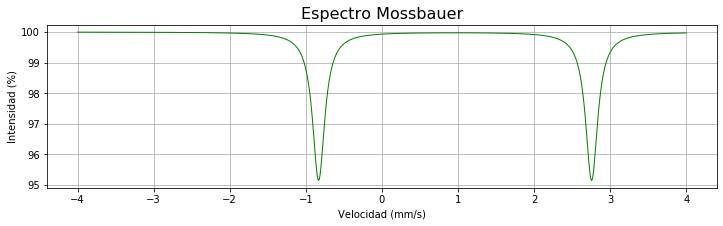

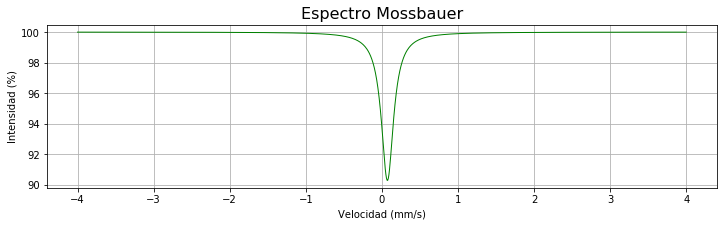

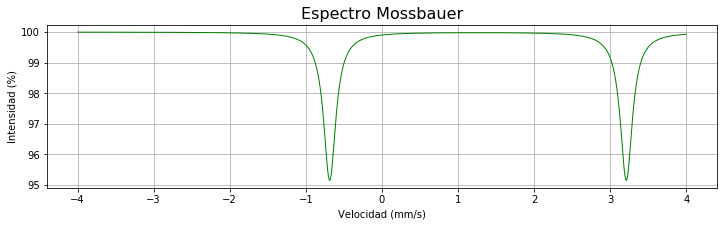

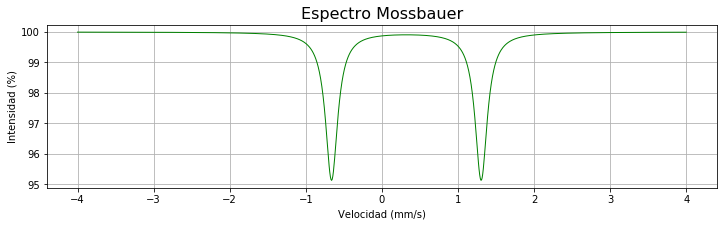

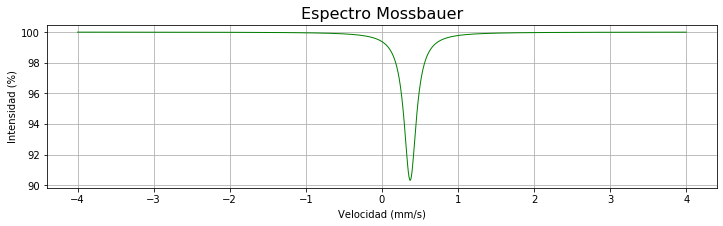

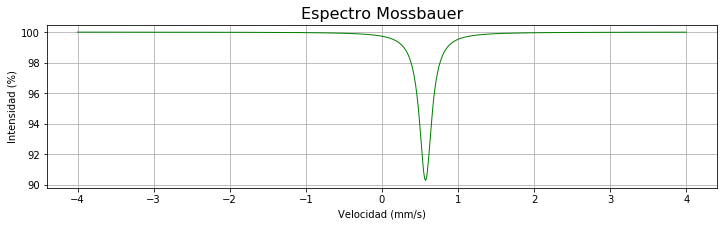

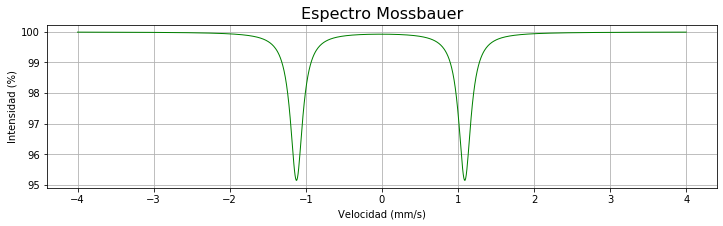

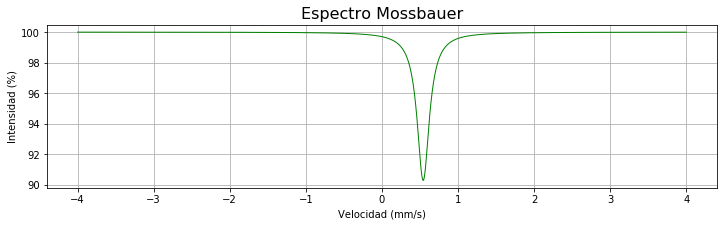

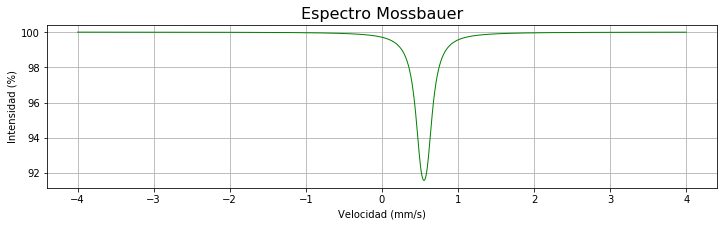

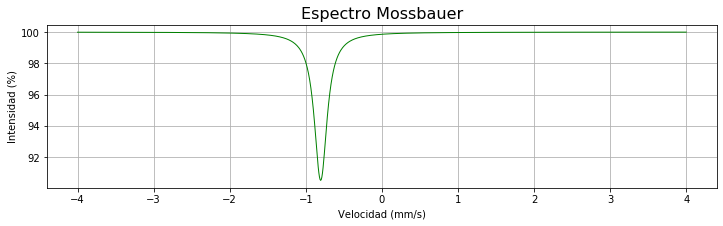

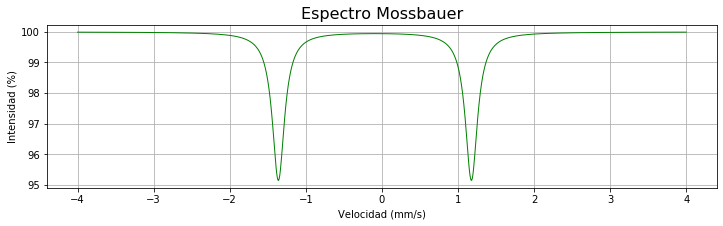

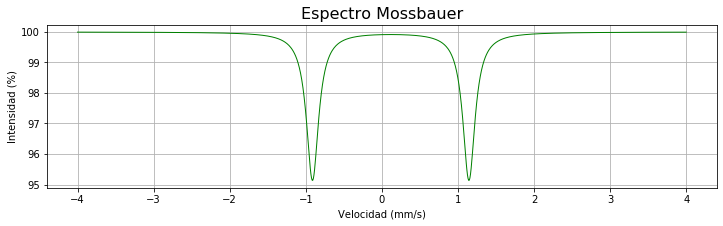

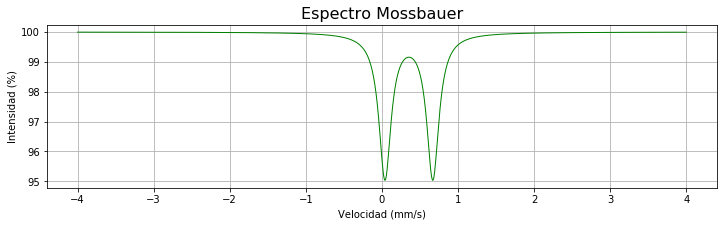

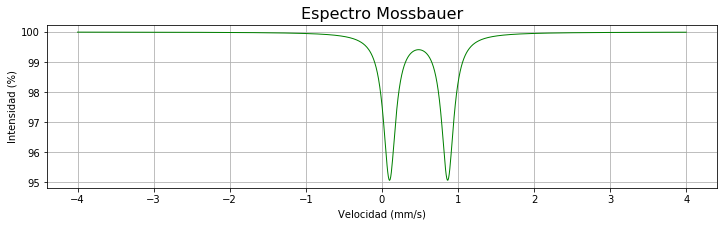

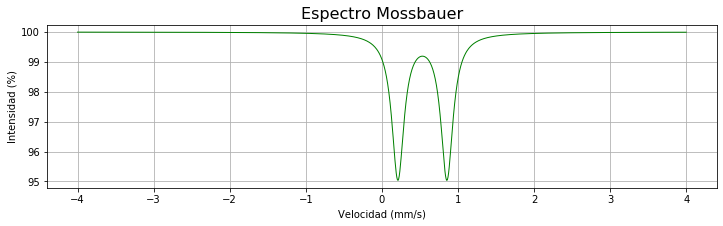

In [6]:
# Función que genera el ajuste Loretziano.
def Ajuste(w, x, IS, QS, I):
    denominador_1 = (x - IS - QS / 2) ** 2 + (w / 2) ** 2
    denominador_2 = (x - IS + QS / 2) ** 2 + (w / 2) ** 2
    Lorentziana = 100 -(I * w / 2 * np.pi) * ((1 / denominador_1) + (1 / denominador_2))
    return Lorentziana 

# Definimos los parámetros necesarios.
#rango = len(parametros.index)      # Número de datos en el dataset.
rango = len(parametros)
          
x = np.linspace(-4, 4, 1000)       # Rango de valores en el eje horizontal.
w = 0.194                          # Ancho natural de la línea Mossbauer.
I = 0.15                           # Parámetro de ajuste de la intensidad.

alpha = -0.3612                    # Valores para la obtención del desplazamineto isomérico.
beta = 2.830
C = 11810

# Creamos dos listas con los valores de los parámetros Mosbbauer de cada compuesto
desplazamiento = []
desdoblamiento = []

#Inicio de un ciclo para cada compuesto del archivo:
for i in range(rango):

# Valor de la densidad electrónica dada en el output de ORCA.
    rho = parametros.Densidad_Electronica[i]
    IS = alpha * (rho - C) + beta      # Valor del desplazamiento isomérico (Isomer Shift)

# Valor del desdoblamiento cuadrupolar (Quadrupole Splitting) dado en el output de ORCA.
    QS = parametros.Desdoblamiento_Cuadrupolar[i]

# Obtención del ajuste dado los parámetros:
    Fit = Ajuste(w, x, IS, QS, I)    
    
# Almacenamos los parámetros Mossbauer de cada compuesto.    
    desplazamiento.append(IS)
    desdoblamiento.append(QS)
    
# Valores de los parámetros Mossbauer:
    print("\n")
    #print("Compuesto: ", parametros.Compuesto[i])
    print("El valor del desplazamiento isomérico es: ", IS, "mm/s")
    print("El valor del desdoblamiento cuadrupolar es: ", QS, "mm/s")

# Realización del gráfico:
    plt.figure(figsize = (12, 3))
    plt.plot(x, Fit, color = 'green', lw = 1) #label = parametros.Compuesto[i])
    plt.grid(True)
    plt.title('Espectro Mossbauer', size = 16)    
    plt.xlabel('Velocidad (mm/s)', size = 10)
    plt.ylabel('Intensidad (%)', size = 10)
    #plt.legend()
    